In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



#from mlxtend.regressor import StackingRegressor

from sklearn.externals import joblib

In [9]:
df=pd.read_csv('E://ElectionData_portugal.csv')
pd.set_option('display.max_columns',None)

In [10]:
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [15]:
df.tail()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.9,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.9,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.9,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.9,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0
21642,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.9,51.28,371931,190712,JPP,0,0.07,0.07,118,0,0


In [11]:
df.shape

(21643, 28)

In [21]:
df['territoryName'].value_counts()

Braga                  1134
Território Nacional    1134
Porto                  1134
Leiria                 1134
Aveiro                 1080
Coimbra                1080
Lisboa                 1080
Viseu                  1080
Madeira                1080
Setúbal                1080
Viana do Castelo       1080
Évora                  1026
Santarém               1026
Faro                   1026
Guarda                 1026
Castelo Branco          972
Bragança                972
Portalegre              918
Beja                    918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

In [22]:
df['Party'].value_counts()

L            1127
CDS-PP       1127
PPD/PSD      1127
PDR          1127
PS           1127
PCTP/MRPP    1127
CH           1127
B.E.         1127
PCP-PEV      1127
PAN          1127
A            1127
IL           1127
PNR          1127
PPM          1073
R.I.R.       1026
PTP          1019
MPT          1019
NC            972
PURP          972
JPP           486
MAS           425
Name: Party, dtype: int64

# Feature Engineering

# checking for missing values in dataset

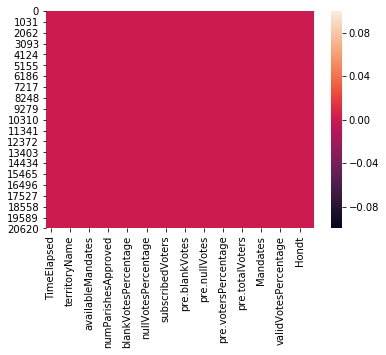

In [13]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()#there are no missing values in  the dataset

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [14]:
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

# Changing the datatype of 'time' column

In [20]:
df['time']=pd.to_datetime(df['time'],format='%Y-%m-%d %H:%M:%S')

# Feature Generation

In [26]:
new_df=pd.DataFrame({'year':df['time'].dt.year,
                     'month':df['time'].dt.month,
                     'day':df['time'].dt.day,
                     
                      'hour':df['time'].dt.hour,
                     'week':df['time'].dt.week,           
                     'minute':df['time'].dt.minute,
                     'seconds':df['time'].dt.second,
                    'quater':df['time'].dt.quarter})


In [27]:
new_df.head()

,year,month,day,hour,week,minute,seconds,quater
0,2019,10,6,20,40,10,2,4
1,2019,10,6,20,40,10,2,4
2,2019,10,6,20,40,10,2,4
3,2019,10,6,20,40,10,2,4
4,2019,10,6,20,40,10,2,4


In [28]:
df=pd.concat([df,new_df],axis=1)

In [29]:
df=df.drop('time',axis=1)#As we have extracted all the features from 'time' column we are dropping it.

# Label Encoder

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Party']=le.fit_transform(df['Party'])

In [34]:
df['territoryName']=le.fit_transform(df['territoryName'])

In [35]:
df.head()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,hour,week,minute,seconds,quater
0,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,17,0,38.29,40.22,147993,94,106,2019,10,6,20,40,10,2,4
1,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,15,0,33.28,34.95,128624,81,77,2019,10,6,20,40,10,2,4
2,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,1,0,6.81,7.15,26307,16,19,2019,10,6,20,40,10,2,4
3,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,2,0,4.90,5.14,18923,12,5,2019,10,6,20,40,10,2,4
4,0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,11,0,4.59,4.83,17757,11,12,2019,10,6,20,40,10,2,4


# Checking correlation between attributes

In [37]:
df.corr()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,hour,week,minute,seconds,quater
TimeElapsed,1.000000,-0.012674,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,0.195487,0.198243,0.195734,0.093739,0.189902,-0.106054,0.054761,0.193160,0.196667,-0.001169,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007,NaN,NaN,0.616137,-0.512023,0.616137,-0.013847,-0.172686,NaN
territoryName,-0.012674,1.000000,0.172374,0.181563,0.223300,0.215599,0.178082,-0.302412,0.196554,-0.126432,0.104222,0.195483,0.193847,0.182412,-0.288817,0.200393,-0.083214,0.078855,0.196979,0.195102,0.012263,0.057823,-0.003433,-0.004874,0.078520,0.084131,0.077042,NaN,NaN,-0.003485,0.001762,-0.003485,-0.000980,0.008375,NaN
totalMandates,0.260377,0.172374,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,0.974407,0.976336,0.973357,0.034774,0.969992,-0.132143,0.151927,0.972976,0.975404,-0.003111,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117,NaN,NaN,0.136754,-0.107229,0.136754,-0.003044,-0.044140,NaN
availableMandates,-0.261627,0.181563,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,0.385828,0.379093,0.383877,-0.008966,0.399074,-0.044174,0.080524,0.391272,0.383089,-0.001882,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764,NaN,NaN,-0.136227,0.106453,-0.136227,0.002638,0.046676,NaN
numParishes,-0.001944,0.223300,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,0.856855,0.850881,0.856779,0.036461,0.864837,-0.058017,0.026407,0.860782,0.853779,-0.004013,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009,NaN,NaN,-0.000534,0.000270,-0.000534,-0.000150,0.001284,NaN
numParishesApproved,0.100432,0.215599,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,0.946191,0.940941,0.947190,0.050378,0.951899,-0.073301,0.042180,0.949110,0.943147,-0.003765,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177,NaN,NaN,0.034277,-0.020880,0.034277,-0.004171,-0.040502,NaN
blankVotes,0.192350,0.178082,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,0.998297,0.997951,0.999657,0.072183,0.997490,-0.150275,0.161642,0.998487,0.998178,-0.003826,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583,NaN,NaN,0.082068,-0.058268,0.082068,-0.003287,-0.050014,NaN
blankVotesPercentage,0.034343,-0.302412,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,0.001598,-0.002062,0.030061,0.959142,-0.006067,-0.307544,-0.105314,0.002821,-0.000069,-0.019692,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195,NaN,NaN,0.001354,0.004426,0.001354,-0.005108,-0.041680,NaN
nullVotes,0.185784,0.196554,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,0.998988,0.998405,0.998883,0.041317,0.999298,-0.125639,0.154965,0.999296,0.998706,-0.003172,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663,NaN,NaN,0.079072,-0.056045,0.079072,-0.003722,-0.048885,NaN
nullVotesPercentage,-0.225021,-0.126432,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,-0.157263,-0.161816,-0.152234,0.100924,-0.141809,0.497749,-0.233688,-0.153891,-0.159566,0.007069,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659,NaN,NaN,-0.081751,0.052503,-0.081751,0.002136,0.088631,NaN


In [14]:
#None of the  features negatively correlated to the target variable are very high.


In [38]:
df.describe()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,hour,week,minute,seconds,quater
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000,21643.0,21643.0,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.0
mean,133.146052,10.116851,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,6.275367e+05,3.390741e+05,7608.001386,2.071985,5914.629950,1.777442,54.549372,6.378503e+05,3.594932e+05,10.096521,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138,2019.0,10.0,6.148963,18.361410,40.148963,26.955136,1.497251,4.0
std,77.651193,5.985225,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,1.525590e+06,8.290404e+05,18493.107257,0.518025,14236.038023,0.388798,4.964948,1.544418e+06,8.763729e+05,6.129654,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644,0.0,0.0,0.356060,7.747974,0.356060,16.623537,0.500004,0.0
min,0.000000,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,32.000000,0.800000,40.000000,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000,2019.0,10.0,6.000000,0.000000,40.000000,0.000000,1.000000,4.0
25%,65.000000,5.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,1130.000000,1.740000,1124.000000,1.520000,51.210000,1.289260e+05,6.964400e+04,4.000000,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000,2019.0,10.0,6.000000,20.000000,40.000000,15.000000,1.000000,4.0
50%,135.000000,10.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.060120e+05,2595.000000,2.030000,2141.000000,1.690000,56.260000,2.284970e+05,1.102730e+05,11.000000,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000,2019.0,10.0,6.000000,21.000000,40.000000,25.000000,1.000000,4.0
75%,200.000000,15.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,5929.000000,2.370000,3967.000000,1.970000,58.220000,3.933140e+05,2.276200e+05,15.000000,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000,2019.0,10.0,6.000000,22.000000,40.000000,40.000000,2.000000,4.0
max,265.000000,20.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,112666.000000,3.660000,86473.000000,3.120000,62.580000,9.439701e+06,5.380451e+06,20.000000,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000,2019.0,10.0,7.000000,23.000000,41.000000,55.000000,2.000000,4.0


In [39]:
#outliers are present in some columns as difference between mean value and max value is very high.

# EDA

# Univariate analysis

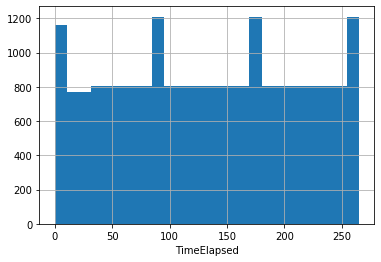

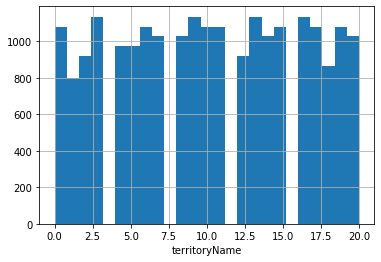

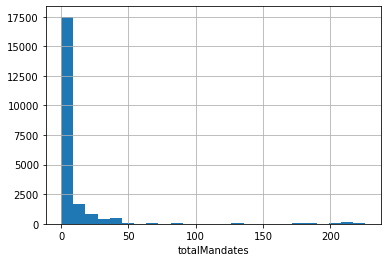

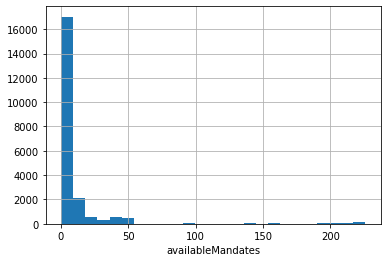

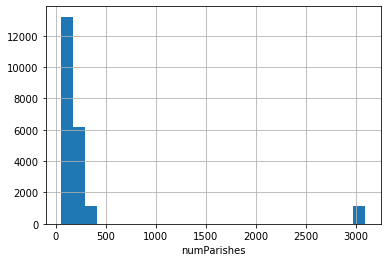

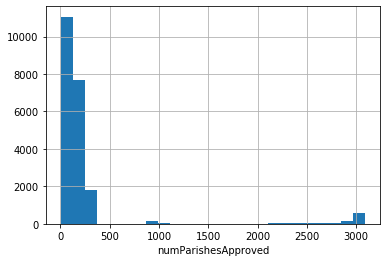

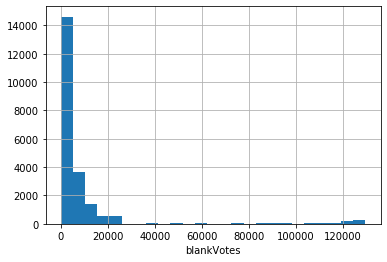

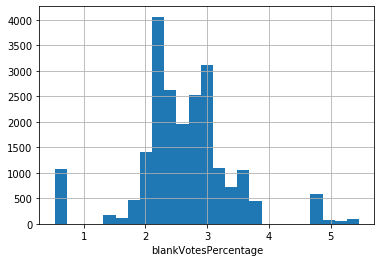

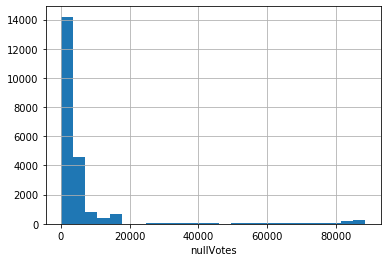

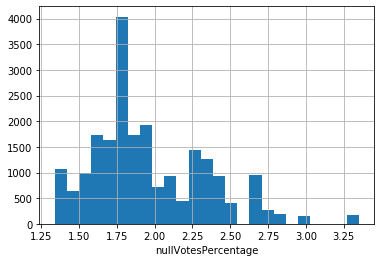

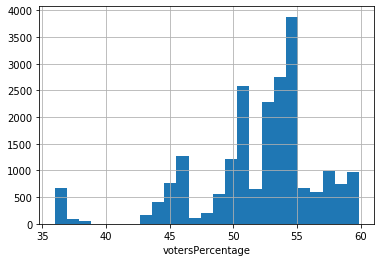

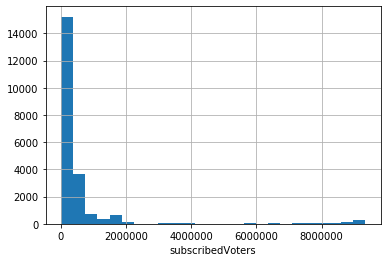

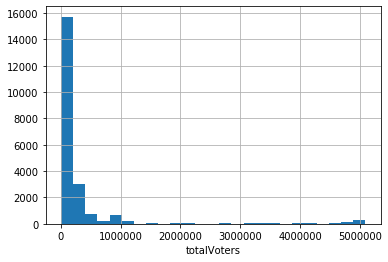

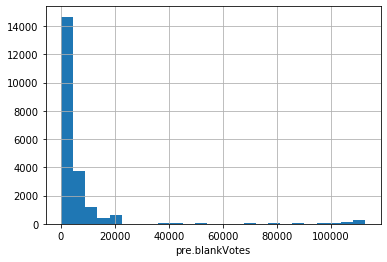

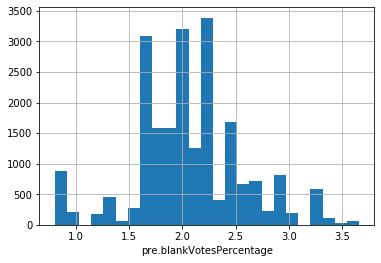

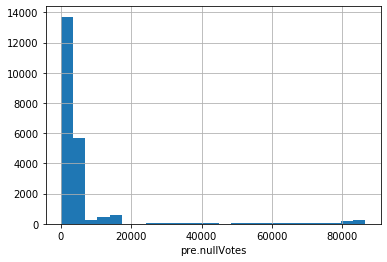

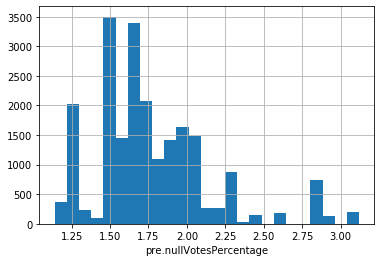

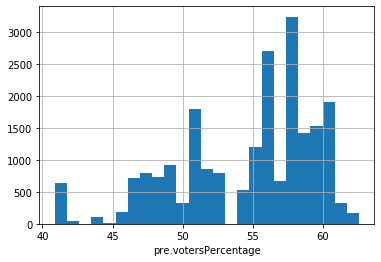

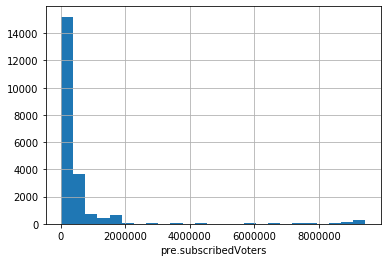

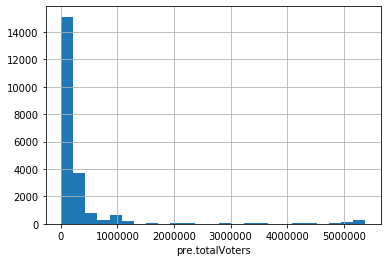

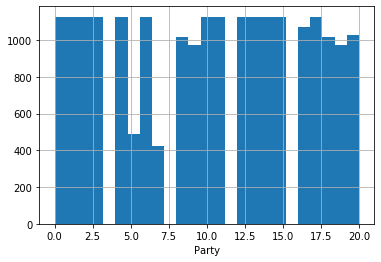

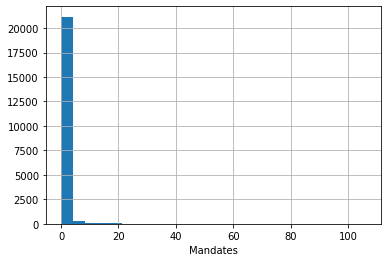

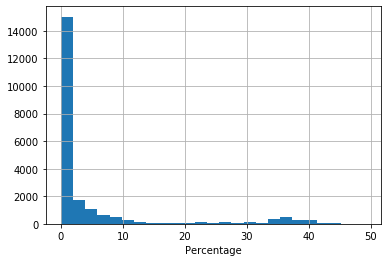

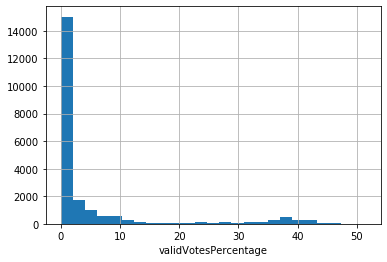

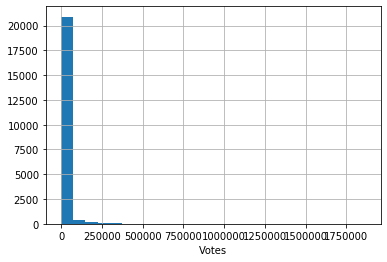

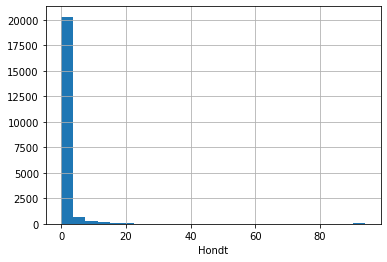

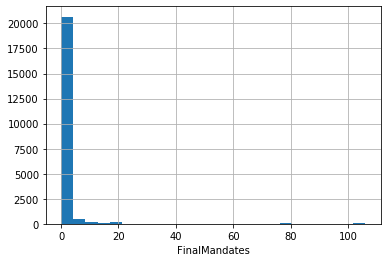

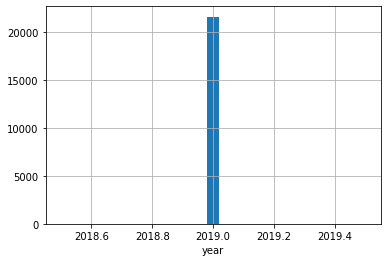

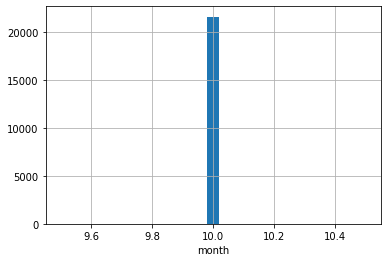

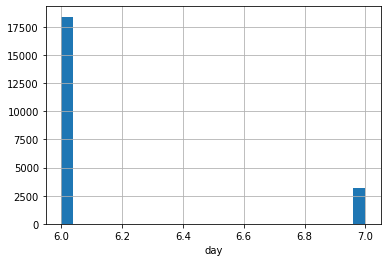

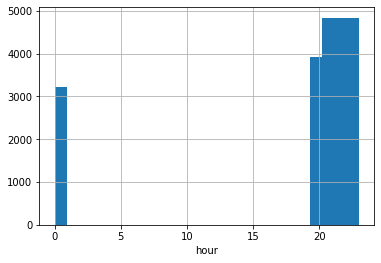

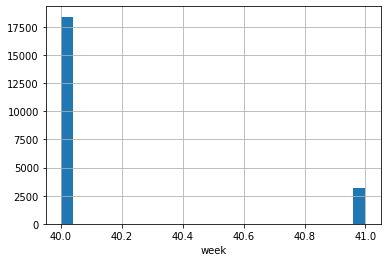

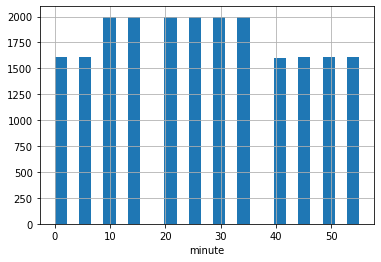

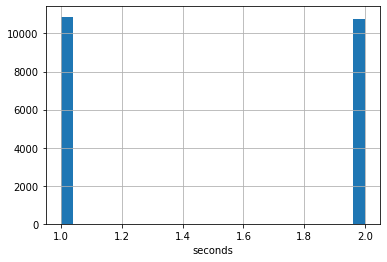

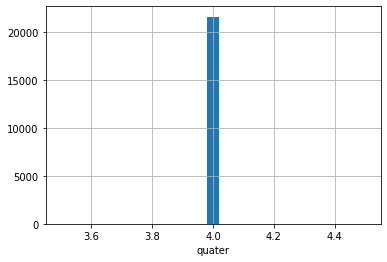

In [40]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

In [33]:
#We can see data is skewed,we need to change it to gaussian distribution before model building.

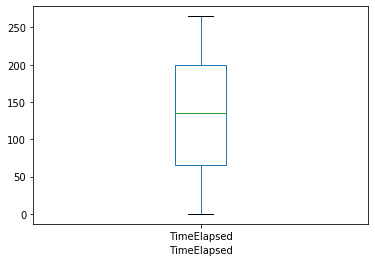

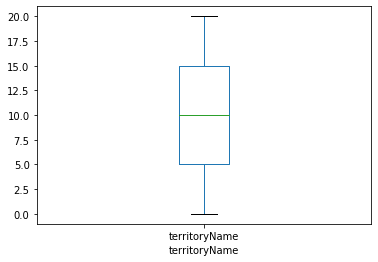

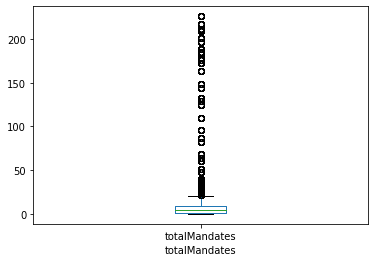

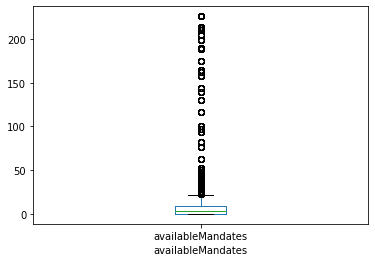

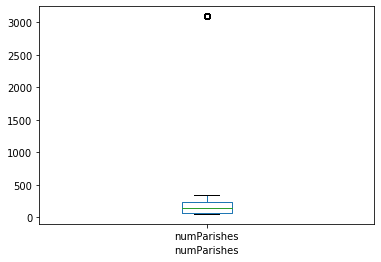

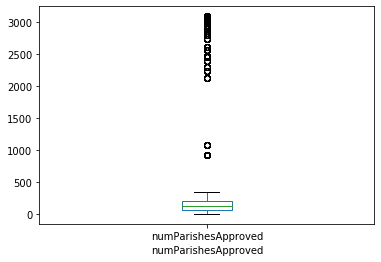

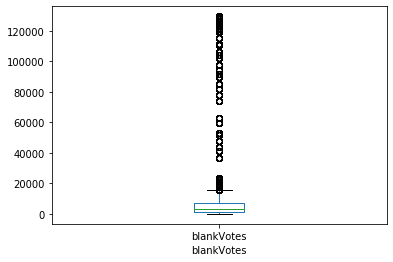

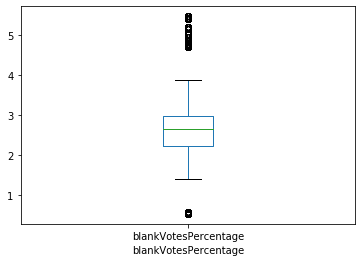

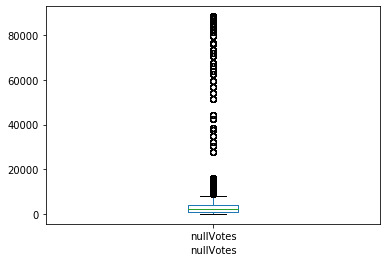

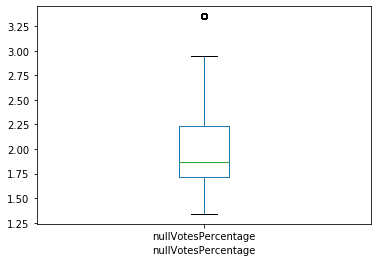

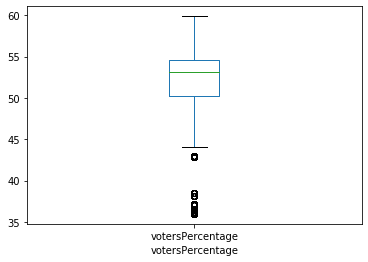

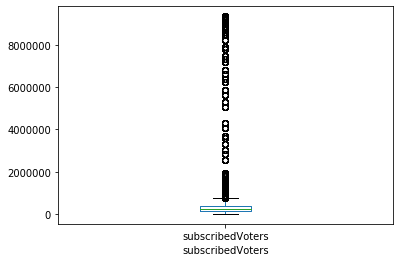

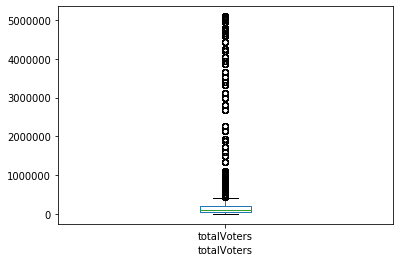

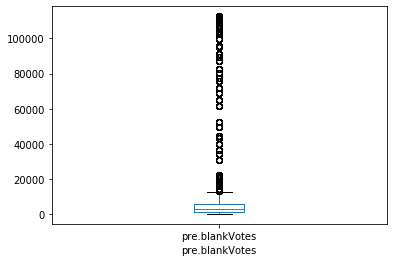

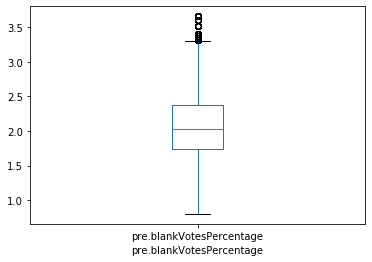

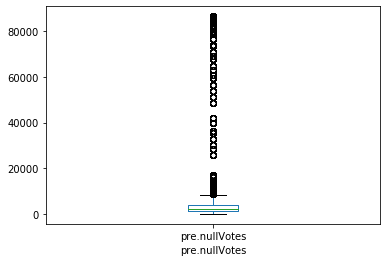

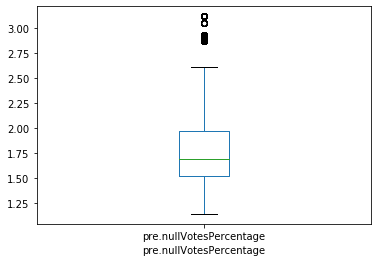

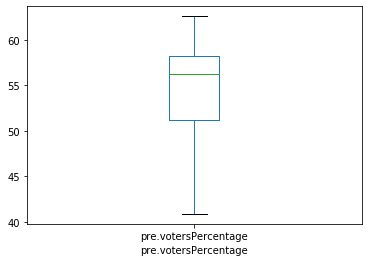

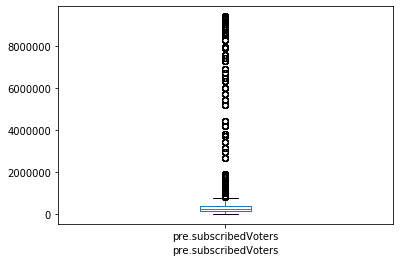

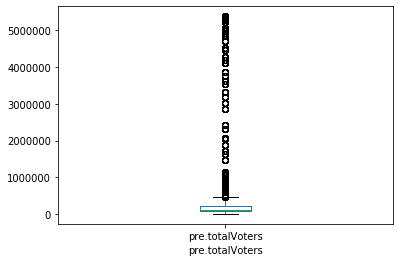

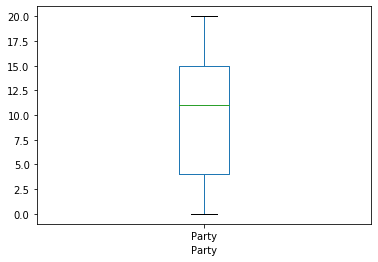

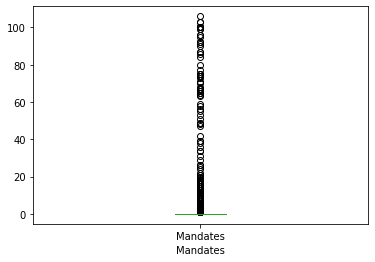

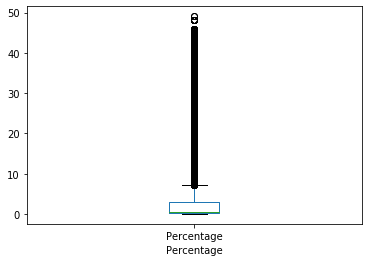

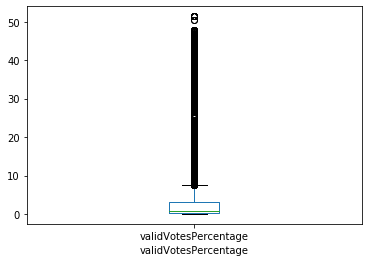

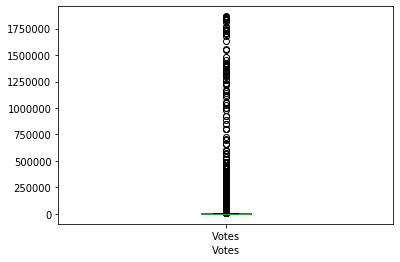

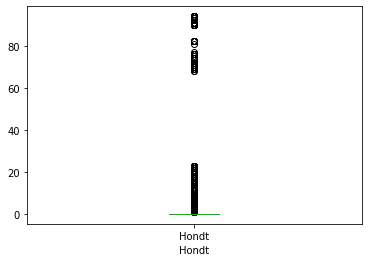

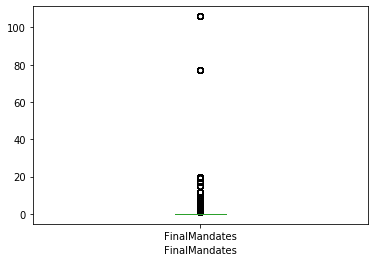

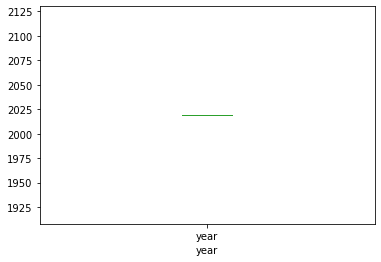

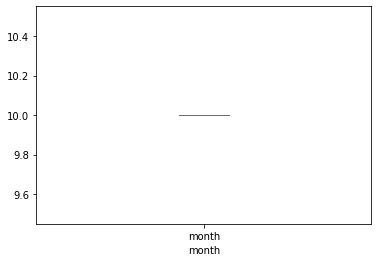

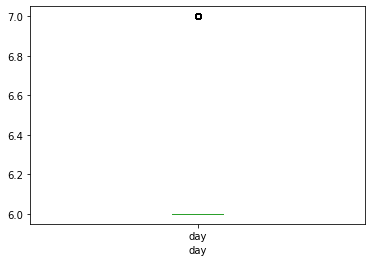

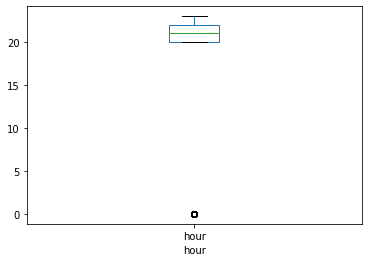

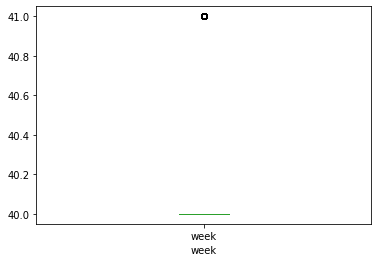

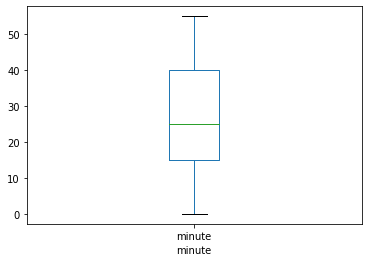

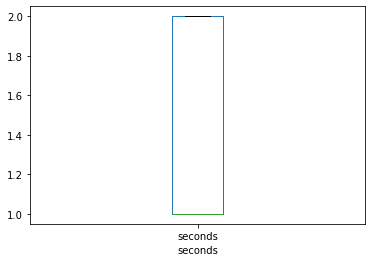

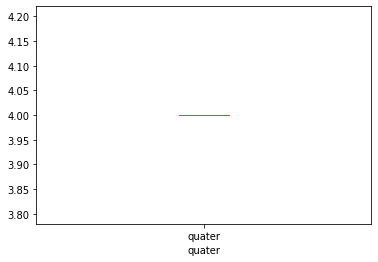

In [41]:
#checking outliers
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Feature Engineering part-2

# Removing unnecessary columns

In [43]:
df=df.drop(['quater','year','month'],axis=1)

# Removing skewness

In [44]:
df.skew()

TimeElapsed                 -0.005496
territoryName               -0.025884
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Party                       -0.083536
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt                       11.489315
FinalMandate

In [45]:
df.dtypes

TimeElapsed                   int64
territoryName                 int32
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                         int32
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
day                         

# Outlier removal

In [46]:
#Removing outliers first
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(21643, 32)

In [47]:
df=df[(z<3).all(axis=1)]
df.shape

(18333, 32)

# Separating training and testing set

In [48]:
#Separating the training and testing set
y=df[['FinalMandates']]
X=df.drop(['FinalMandates'],axis=1)

In [49]:
df.skew()

TimeElapsed                -0.024110
territoryName               0.034073
totalMandates               2.542453
availableMandates           2.593527
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                  1.800122
blankVotesPercentage       -0.844508
nullVotes                   2.103352
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters            2.407541
totalVoters                 2.468630
pre.blankVotes              2.034860
pre.blankVotesPercentage   -0.410446
pre.nullVotes               2.340000
pre.nullVotesPercentage     1.033803
pre.votersPercentage       -0.514215
pre.subscribedVoters        2.370988
pre.totalVoters             2.468950
Party                       0.009657
Mandates                    7.177093
Percentage                  3.373567
validVotesPercentage        3.383145
Votes                       7.310058
Hondt                       7.012845
FinalMandates               6.746120
d

# Skewness removal by power transformation technique

In [50]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [51]:
df.skew()

TimeElapsed                -0.304093
territoryName              -0.203227
totalMandates               0.002345
availableMandates           0.202983
numParishes                -0.034558
numParishesApproved        -0.090709
blankVotes                 -0.037449
blankVotesPercentage        0.020909
nullVotes                   0.000873
nullVotesPercentage         0.032199
votersPercentage           -0.027271
subscribedVoters            0.009438
totalVoters                 0.008515
pre.blankVotes             -0.025192
pre.blankVotesPercentage    0.001446
pre.nullVotes               0.008894
pre.nullVotesPercentage     0.015836
pre.votersPercentage       -0.164339
pre.subscribedVoters        0.011632
pre.totalVoters             0.011831
Party                      -0.248787
Mandates                    3.396232
Percentage                  0.507064
validVotesPercentage        0.499420
Votes                       0.001488
Hondt                       2.432750
day                         1.949782
h

# Scaling the data

In [52]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [53]:
x.head()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,day,hour,week,minute,seconds
0,-1.752045,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,-1.044112,0.18551,-0.878763,-0.824635,-0.876866,-0.45199,-0.952474,-0.375814,-0.133418,-0.900191,-0.845089,1.177919,-0.206043,4.612609,4.603604,-0.190208,4.560088,-0.421705,0.212549,-0.421705,-1.013809,1.016445
1,-1.752045,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,-1.044112,0.18551,-0.878763,-0.824635,-0.876866,-0.45199,-0.952474,-0.375814,-0.133418,-0.900191,-0.845089,-1.435236,-0.206043,0.644624,0.642757,-0.282371,0.445033,-0.421705,0.212549,-0.421705,-1.013809,1.016445
2,-1.752045,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,-1.044112,0.18551,-0.878763,-0.824635,-0.876866,-0.45199,-0.952474,-0.375814,-0.133418,-0.900191,-0.845089,-1.271914,-0.206043,0.448145,0.447038,-0.286949,0.445033,-0.421705,0.212549,-0.421705,-1.013809,1.016445
3,-1.752045,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,-1.044112,0.18551,-0.878763,-0.824635,-0.876866,-0.45199,-0.952474,-0.375814,-0.133418,-0.900191,-0.845089,0.197986,-0.206043,-0.105837,-0.106326,-0.299823,-0.240810,-0.421705,0.212549,-0.421705,-1.013809,1.016445
4,-1.752045,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,-1.044112,0.18551,-0.878763,-0.824635,-0.876866,-0.45199,-0.952474,-0.375814,-0.133418,-0.900191,-0.845089,0.034664,-0.206043,-0.157542,-0.157016,-0.301008,-0.240810,-0.421705,0.212549,-0.421705,-1.013809,1.016445


# Model building

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [55]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [56]:
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [57]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [58]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    
    
    
    
   
    

***************** KNeighborsRegressor *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.9885604472597704


cross_val_score  - 0.9717562758989218


rmse_score  - 0.14567649257397774


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - 0.9813716647716264


cross_val_score  - 0.32793160003509814


rmse_score  - 0.18589682673058636


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.983877956264505


cross_val_score  - -2.1603782769697676e+24


rmse_score  - 0.17293981956406032


***************** DecisionTreeRegressor *******************


DecisionTreeReg

In [59]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsRegressor,98.856045,0.145676,9.717563e+01
1,SVR,98.137166,0.185897,3.279316e+01
2,LinearRegression,98.387796,0.172940,-2.160378e+26
3,DecisionTreeRegressor,99.894165,0.044310,9.859675e+01
4,GradientBoostingRegressor,99.596257,0.086544,9.842390e+01
5,AdaBoostRegressor,98.285761,0.178328,9.707144e+01
6,RandomForestRegressor,99.923211,0.037743,9.855974e+01
7,XGBRegressor,99.933292,0.035178,9.820998e+01


In [132]:
#We can see DecisionTreeRegressor is performing the best with cross_val_score=98.59% 
#And also the RMSE score in the minimum and is well within range for this particular problem.

In [133]:
#We have reached our target score is 90%
#Hence we will  not apply Gridsearchcv to increase the score even more.

# Finding the best random_state for all models

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [61]:
print('knn',maxr2_score(knn,x,y))
print('SVR',maxr2_score(svr,x,y))
print('lr',maxr2_score(lr,x,y))
print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

print('ada',maxr2_score(ada,x,y))

max_r2_score is at random_state   100   which is   0.990736457926052
knn 100
max_r2_score is at random_state   44   which is   0.9894683876507341
SVR 44
max_r2_score is at random_state   47   which is   0.9892277908461665
lr 47
max_r2_score is at random_state   62   which is   1.0
dt 62
max_r2_score is at random_state   47   which is   0.9976033158390505
gbm 47
max_r2_score is at random_state   80   which is   0.9998815573020285
rfr 80
max_r2_score is at random_state   80   which is   0.9999597164640586
xgb 80
max_r2_score is at random_state   87   which is   0.9901797017475424
ada 87


# Saving the final DecisionTreeRegressor model

In [66]:
#From all the model tried above DecisionTreeRegressor model has highest cross_val_score .
#Hence saving the DecisionTreeRegressor model as our final model
#corresponding random_state=62
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=62)
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
score=r2_score(y_test,pred_dt)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_dt)))

R2_score=   1.0
RMSE score=  0.0


In [67]:
dt.fit(x,y)
cvs=cross_val_score(dt,x,y,cv=10,scoring='r2').mean()
print('cross_val_scores = ',cvs)

cross_val_scores =  0.9979553717861002


In [68]:
from sklearn.externals import joblib
joblib.dump(dt,'Project19-portugal_elections.obj')

['Project19-portugal_elections.obj']

In [69]:
model=joblib.load('Project19-portugal_elections.obj')

# Saving final predictions in file.csv

In [73]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['FinalMandates'])

In [74]:
final_predictions.sample(n=10)

,FinalMandates
3408,0.0
3406,12.0
2325,0.0
2265,0.0
3567,0.0
2846,0.0
4442,0.0
3911,6.0
781,0.0
3390,0.0


In [52]:
final_predictions.to_csv('E:\\final_predictionsportugalelections.csv',index=False)

# Conclusion:-